## Generating Synthetic Dataset

To build a robust machine learning model for water tank monitoring, we need a comprehensive dataset that captures various scenarios. Since real-world data may not always be available or sufficient, we generate a synthetic dataset with the following features:

1. Water Level (%): Represents the current water level in the tank as a percentage.
2. Time Since Refill (hours): The time elapsed since the last refill of the tank.
3. Usage Rate (L/hour): The rate at which water is being consumed from the tank.
4. Temperature (°C): The ambient temperature around the tank.
5. Humidity (%): The humidity level around the tank.
6. Leakage Rate (L/hour): The rate at which water is leaking from the tank, if any.

### Steps to Generate the Dataset

1. Set Random Seed: For reproducibility, we set a random seed using `np.random.seed(42)`.
2. Generate Feature Distributions:
    - Water Level: Uniformly distributed between 5% and 100%.
    - Time Since Refill: Uniformly distributed between 0 and 120 hours.
    - Usage Rate: Uniformly distributed between 0.1 and 5.0 L/hour.
    - Temperature: Uniformly distributed between 15°C and 40°C.
    - Humidity: Uniformly distributed between 30% and 90%.
    - Leakage Rate: 10% chance of leakage, with rates between 0.5 and 10 L/hour.
3. Determine Target Class:
    - Needs Refill: Water level < 20% and time since refill > 48 hours.
    - Leak Detected: Leakage rate > 0.5 L/hour and water level < 80%.
    - Normal: All other conditions.
4. Create DataFrame: Combine the generated features and target classes into a pandas DataFrame.
5. Save Dataset: Save the DataFrame to a CSV file for future use.

This synthetic dataset allows us to train and evaluate machine learning models effectively, ensuring they can handle various real-world scenarios.


In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
num_samples = 500  # Number of data points

# Feature distributions
water_level = np.random.uniform(5, 100, num_samples)  # Water level in %
time_since_refill = np.random.uniform(0, 120, num_samples)  # Time since last refill in hours
usage_rate = np.random.uniform(0.1, 5.0, num_samples)  # Water consumption rate in L/hour
temperature = np.random.uniform(15, 40, num_samples)  # Temperature in Celsius
humidity = np.random.uniform(30, 90, num_samples)  # Humidity in %
leakage_rate = np.random.choice([0, np.random.uniform(0.5, 10)], num_samples, p=[0.8, 0.2])  # 20% chance of leakage

# Determine target class
labels = []
for i in range(num_samples):
    if water_level[i] < 20 and time_since_refill[i] > 48:
        labels.append(1)  # Needs refill
    elif leakage_rate[i] > 0.5 and water_level[i] < 80:
        labels.append(2)  # Leak detected
    else:
        labels.append(0)  # Normal

# Create DataFrame
df = pd.DataFrame({
    "Water_Level(%)": water_level,
    "Time_Since_Refill(hours)": time_since_refill,
    "Usage_Rate(L/hour)": usage_rate,
    "Temperature(°C)": temperature,
    "Humidity(%)": humidity,
    "Leakage_Rate(L/hour)": leakage_rate,
    "Status": labels  # 0 = Normal, 1 = Needs Refill, 2 = Leak Detected
})

# Save dataset
file_path = "water_monitor_dataset.csv"
df.to_csv(file_path, index=False)

# Return file path
file_path

'water_monitor_dataset.csv'

In [ ]:
dataset = pd.read_csv('water_monitor_dataset.csv')
dataset.head()

,Water_Level(%),Time_Since_Refill(hours),Usage_Rate(L/hour),Temperature(°C),Humidity(%),Leakage_Rate(L/hour),Status
0,40.581311,83.779406,1.007151,27.977045,45.702341,0.00000,0
1,95.317859,64.331564,2.755315,26.979547,44.818728,0.00000,0
2,74.539424,37.143314,4.377435,15.641052,84.375275,8.36143,2
3,61.872556,97.655402,3.687902,23.531196,44.972772,0.00000,0
4,19.821771,82.167741,4.052150,24.504890,46.316984,0.00000,1


Split Data into Training & Testing Sets

Instead of using all the data for training, split it into training and testing sets to evaluate model performance:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Load dataset
X = df.drop(columns=["Status"]).values  # Features
y = df["Status"].values  # Labels

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Test Model on Unseen Data

Now, use the test set (X_test) to check model accuracy:

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed performance report
print(classification_report(y_test, y_pred))


Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        22

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Example using predetermined input

In [ ]:
# water_level = 80.0
# time_since_refill = 1.0
# usage_rate = 0.5
# temperature = 21.0
# humidity = 70.0
# leakage_rate = 0.1

In [ ]:
# Define the features for the water tank
water_level = 60
time_since_refill = 188
usage_rate = 0.5
temperature = 21.0
humidity = 70.0
leakage_rate = 0.1

# Create a feature array
features = np.array([[water_level, time_since_refill, usage_rate, temperature, humidity, leakage_rate]])

# Make the prediction
prediction = rf_model.predict(features)

# Print the prediction
status_dict = {0: "Normal", 1: "Needs Refill", 2: "Leak Detected"}
print(f"Predicted Status: {status_dict[prediction[0]]}")


Predicted Status: Normal


In [ ]:
# Calculate the estimated time left before the water level reaches 15%
warning_level = 15  # Warning level in %
time_to_warning_level_hours = (water_level - warning_level) / usage_rate
time_to_warning_level_minutes = time_to_warning_level_hours * 60

print(f"Estimated time left before reaching 15%: {time_to_warning_level_hours:.2f} hours ({time_to_warning_level_minutes:.2f} minutes)")

# Calculate the estimated time left before the water level reaches 0%
time_to_empty_hours = water_level / usage_rate
time_to_empty_minutes = time_to_empty_hours * 60

print(f"Estimated time left before empty: {time_to_empty_hours:.2f} hours ({time_to_empty_minutes:.2f} minutes)")


Estimated time left before reaching 15%: 90.00 hours (5400.00 minutes)
Estimated time left before empty: 120.00 hours (7200.00 minutes)


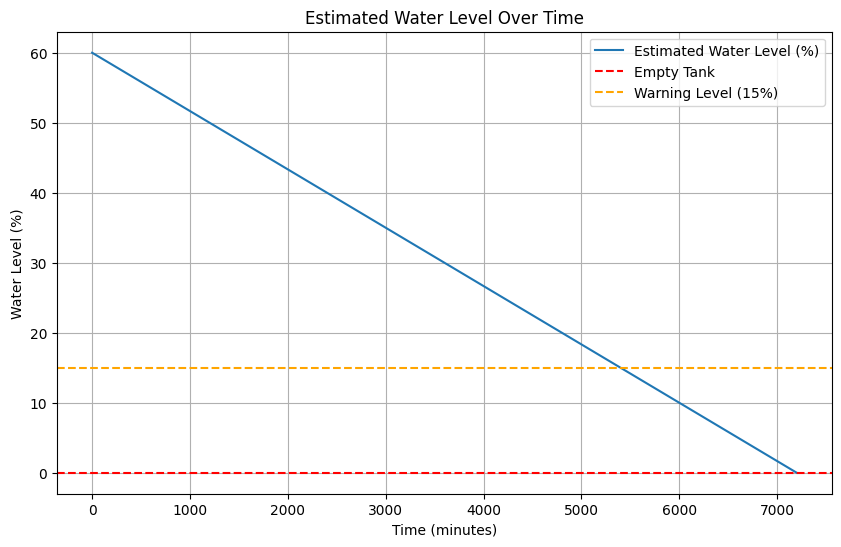

In [ ]:
import matplotlib.pyplot as plt

# Calculate the estimated water level over time
time_intervals = np.arange(0, estimated_refill_minutes + 1, 60)  # Time intervals in minutes
estimated_water_levels = water_level - (usage_rate * (time_intervals / 60))  # Water level decreases over time

# Filter the arrays to stop when the water level reaches 0%
valid_indices = estimated_water_levels >= 0
time_intervals = time_intervals[valid_indices]
estimated_water_levels = estimated_water_levels[valid_indices]

# Plot the estimated water level over time
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, estimated_water_levels, label='Estimated Water Level (%)')
plt.axhline(y=0, color='r', linestyle='--', label='Empty Tank')
plt.axhline(y=15, color='orange', linestyle='--', label='Warning Level (15%)')
plt.xlabel('Time (minutes)')
plt.ylabel('Water Level (%)')
plt.title('Estimated Water Level Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Check if any water level is below 15% and print a warning
if np.any(estimated_water_levels < 15):
    print("Warning: Water level is expected to drop below 15%!")

Example when the system detects a leak

In [ ]:
# Define the features for the water tank
water_level = 100
time_since_refill = 188
usage_rate = 0.5
temperature = 21.0
humidity = 70.0
leakage_rate = 2

# Create a feature array
features = np.array([[water_level, time_since_refill, usage_rate, temperature, humidity, leakage_rate]])

# Make the prediction
prediction = rf_model.predict(features)

# Define a threshold for leakage detection
leakage_threshold = 1.0  # Adjust this value based on your system's characteristics

# Determine the status
if leakage_rate > leakage_threshold:
    status = 2  # Leak Detected
else:
    status = prediction[0]

# Print the prediction
status_dict = {0: "Normal", 1: "Needs Refill", 2: "Leak Detected"}
print(f"Predicted Status: {status_dict[status]}")

Predicted Status: Leak Detected


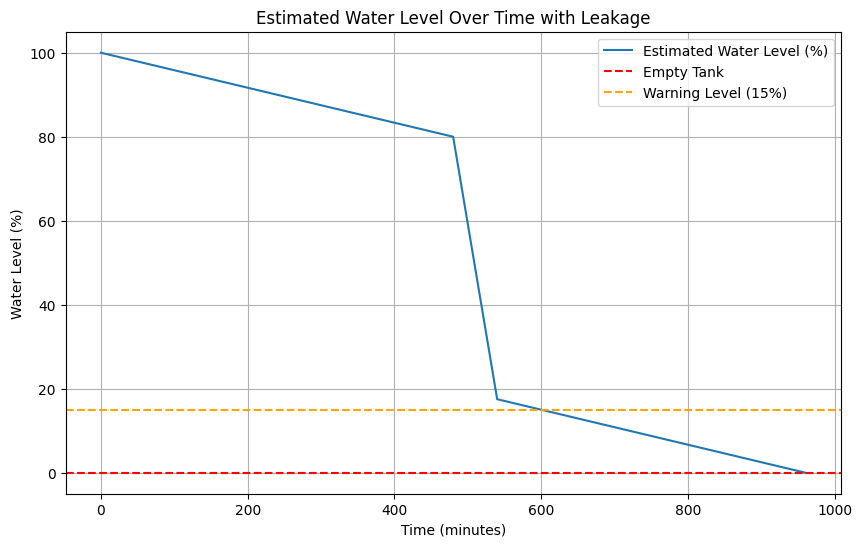

In [ ]:
import matplotlib.pyplot as plt

# Define the leakage rate
leakage_rate = 2  # Leakage rate in L/hour

# Calculate the estimated water level over time considering the leakage
time_intervals = np.arange(0, estimated_refill_minutes + 1, 60)  # Time intervals in minutes
estimated_water_levels = water_level - (usage_rate * (time_intervals / 60)) - (leakage_rate * (time_intervals / 60))  # Water level decreases over time

# Introduce a sharp drop when a leak is detected
leak_detected_index = np.argmax(estimated_water_levels < 80)  # Assuming leak is detected when water level < 80%
if leak_detected_index > 0:
    estimated_water_levels[leak_detected_index:] -= 60 # Sharp drop of 20%

# Filter the arrays to stop when the water level reaches 0%
valid_indices = estimated_water_levels >= 0
time_intervals = time_intervals[valid_indices]
estimated_water_levels = estimated_water_levels[valid_indices]

# Plot the estimated water level over time
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, estimated_water_levels, label='Estimated Water Level (%)')
plt.axhline(y=0, color='r', linestyle='--', label='Empty Tank')
plt.axhline(y=15, color='orange', linestyle='--', label='Warning Level (15%)')
plt.xlabel('Time (minutes)')
plt.ylabel('Water Level (%)')
plt.title('Estimated Water Level Over Time with Leakage')
plt.legend()
plt.grid(True)
plt.show()

# Check if any water level is below 15% and print a warning
if np.any(estimated_water_levels < 15):
    print("Warning: Water level is expected to drop below 15%!")